# Final Project Proposal: Population & Poverty Trends in the US

### Team Members

- Alexander Schmig
- Jacob Shaw

## Abstract

This project’s goal is to present visualizations to show trends in population growth by age and
sex (hence referred to as population rate) and in poverty by county in the United States, and to
show their relationship and correlation (or lack thereof). Our proposal will cover the datasets we
will be utilizing, the hypotheses we are seeking to answer, and the visualizations we will be
creating to represent the data and to answer those hypotheses.

# Introduction

The reason we want to analyze this data is to show if there are any correlations between
population rates and poverty rates in the last 10 years since the most recent dataset made
available (that being data for the year 2022). The intended purpose of our project is to display
the trends of population rate variations in counties alongside the poverty rate trend variations in
the same counties. With this information, we hope to answer with significant confidence the null
hypothesis that there is no correlation between population rates and poverty rates; or answer
with significant confidence the alternative hypothesis, that there is some significant correlation
between population rates and poverty rates.

The visualizations found while researching this topic were focused more on poverty exclusively
([here[1]](https://ourworldindata.org/poverty) and [here[2]](https://www.visualcapitalist.com/visualizing-poverty-rate-u-s-states/)) or were global-focused where the intent was to focus on country-wide
poverty rates. The United States Census Bureau, where we found our datasets, provides a
source of several visualizations based on these datasets ([here [3]](https://www.census.gov/topics/income-poverty/library/visualizations.html)). The visualizations widely
vary, looking at childhood poverty to women's earnings to measuring the nation's social and
economic well-being. With all of these visualizations not quite covering population and poverty
rates, I find that our visualization will contribute new information to this area of research.

## Questions or Objectives

Our visualizations will be both geographic and tabular. There will be two geographic maps, one
to show the median poverty rate differences from 2012-2022 and the other to show median
population rate differences from 2012-2022. Accompanying these maps will be tabular graphs
(or possibly bar graphs if deemed more visually effective) which show the top counties that have
either:

### Objectives 1

1. High poverty and high population rates

2. High poverty and low population rates

3. Low poverty and high population rates

4. Low poverty and low population rates

We define “high” rates as a positive value, and “low” rates as either 0% change or negative
values. Population rates are generally preferred to be positive as that means there will be more
children born and people who have moved into the area than people who have died and those
who no longer live in the area. Similarly for poverty, we define a “high” rate as an increase of
individuals who fall below the poverty line as defined by the federal government in that area
over time and “low” rates as a decrease in individuals within the area who fall below the poverty
line.

Another objective is to view the correlation between the rate of poverty and rate of population.
Does there appear to be strong correlation (positive or negative) or is there a lack of relationship
(zero correlation). More specifically,

### Objectives 2

1. What happens to poverty rates in low population counties as population increases?

2. What happens to poverty rates in high population counties as population decreases?

3. What happens to population rates in low poverty counties as poverty increases?

4. What happens to population rates in high poverty counties as poverty decreases?


# Process

## Data Processing

In [1]:
import pandas as pd

path = "2010_2022_pov_data.csv"
df = pd.read_csv(path)
df.head()

/tmp/ipykernel_623/4217545085.py:4: DtypeWarning: Columns (26,27,28,29,30,31,44,45,46,47,48,49,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,198,199,202,203,204,205,208,209,210,211,214,215,216,217,220,221,222,223,232,233,234,235,238,239,240,241,244,245,246,247,248,249,256,257,258,259,262,263,264,265,268,269,270,271,273,274,275,276,277,296,297,302,303,308,309,346,347,348,349,350,351) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,GEO_ID,NAME,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,S1701_C01_002E,S1701_C01_002M,...,S1701_C03_061E,S1701_C03_061M,Unnamed: 368,S1701_C01_062E,S1701_C01_062M,S1701_C02_062E,S1701_C02_062M,S1701_C03_062E,S1701_C03_062M,Unnamed: 374
0,0500000US01003,"Baldwin County, Alabama",180686,985,23610,4573,13.1,2.5,41865,592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01015,"Calhoun County, Alabama",116553,1987,29082,4105,25.0,3.4,26847,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01043,"Cullman County, Alabama",79692,834,16848,3811,21.1,4.8,18892,588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01049,"DeKalb County, Alabama",70453,682,13788,4362,19.6,6.2,18233,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01051,"Elmore County, Alabama",72069,3261,7923,2292,11.0,3.1,18189,306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# selecting and renaming columns of interest
columns_renamed = {
                    'NAME': 'NAME',
                    'S1701_C01_001E': 'total_pop',
                    'S1701_C02_001E': 'below_pov',
                    'S1701_C01_002E': 'total_under_18',
                    'S1701_C02_002E': 'below_pov_under_18',
                    'S1701_C01_004E': 'total_18_to_64',
                    'S1701_C02_004E': 'below_pov_18_to_64',
                    'S1701_C01_005E': 'total_over_64',
                    'S1701_C02_005E': 'below_pov_over_64',
                    'S1701_C01_006E': 'total_male',
                    'S1701_C02_006E': 'below_pov_male',
                    'S1701_C01_007E': 'total_female',
                    'S1701_C02_007E': 'below_pov_female',
                    'YEAR': 'YEAR'}
df = df.rename(columns=columns_renamed)[columns_renamed.values()]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NAME                9986 non-null   object
 1   total_pop           9986 non-null   int64 
 2   below_pov           9986 non-null   int64 
 3   total_under_18      9986 non-null   int64 
 4   below_pov_under_18  9986 non-null   int64 
 5   total_18_to_64      9986 non-null   int64 
 6   below_pov_18_to_64  9986 non-null   int64 
 7   total_over_64       9986 non-null   object
 8   below_pov_over_64   9986 non-null   object
 9   total_male          9986 non-null   int64 
 10  below_pov_male      9986 non-null   int64 
 11  total_female        9986 non-null   int64 
 12  below_pov_female    9986 non-null   int64 
 13  YEAR                9986 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [3]:
df["total_pov_ratio"] = df["below_pov"] / df["total_pop"]
df["under_18_pov_ratio"] = df["below_pov_under_18"] / df["total_under_18"]
df["18_to_64_pov_ratio"] = df["below_pov_18_to_64"] / df["total_18_to_64"]
#df["total_pov_ratio"] = df["below_pov_over_64"] / df["total_over_64"]
df["male_pov_ratio"] = df["below_pov_male"] / df["total_male"]
df["female_pov_ratio"] = df["below_pov_female"] / df["total_female"]
df.head()

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,below_pov_male,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio
0,"Baldwin County, Alabama",180686,23610,41865,8091,109204,13958,29617,1561,88311,8822,92375,14788,2010,0.130669,0.193264,0.127816,0.099897,0.160087
1,"Calhoun County, Alabama",116553,29082,26847,9137,73074,18319,16632,1626,55830,11527,60723,17555,2010,0.249517,0.340336,0.250691,0.206466,0.289100
2,"Cullman County, Alabama",79692,16848,18892,5543,48175,10051,12625,1254,39438,7604,40254,9244,2010,0.211414,0.293405,0.208635,0.192809,0.229642
3,"DeKalb County, Alabama",70453,13788,18233,5609,42707,7109,9513,1070,35219,6769,35234,7019,2010,0.195705,0.307629,0.166460,0.192197,0.199211
4,"Elmore County, Alabama",72069,7923,18189,2707,45045,4698,8835,518,34368,4073,37701,3850,2010,0.109936,0.148826,0.104296,0.118511,0.102119


In [10]:
df_yoy = pd.DataFrame()

for name in set(df["NAME"].to_list()):
    # creating copy to fully separate dataframes
    dt = df[df["NAME"] == name].copy()
    # this works because we loaded and added data to the dataset 
    # in order of oldest to newest
    dt["total_pop_yoy"] = dt["total_pop"].pct_change(periods=1)
    dt["total_pov_ratio_yoy"] = dt["total_pov_ratio"].pct_change(periods=1)
    df_yoy = pd.concat([df_yoy, dt])
df_yoy.head()

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,...,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio,total_pop_yoy,total_pov_ratio_yoy
93,"Mesa County, Colorado",142123,23249,34121,6955,86868,15201,21134,1093,69785,...,72338,12867,2010,0.163584,0.203833,0.174990,0.148771,0.177873,NaN,NaN
911,"Mesa County, Colorado",143883,16209,33734,3561,88432,10830,21717,1818,71605,...,72278,9166,2011,0.112654,0.105561,0.122467,0.098359,0.126816,0.012384,-0.311337
1733,"Mesa County, Colorado",144569,23285,33439,7793,88762,12515,22368,2977,73093,...,71476,12249,2012,0.161065,0.233051,0.140995,0.150986,0.171372,0.004768,0.429731
2558,"Mesa County, Colorado",143253,23910,31788,7040,87727,14753,23738,2117,70074,...,73179,12063,2013,0.166907,0.221467,0.168169,0.169064,0.164842,-0.009103,0.036274
3386,"Mesa County, Colorado",144821,24537,32078,7275,88519,15446,24224,1816,72193,...,72628,13200,2014,0.169430,0.226791,0.174494,0.157037,0.181748,0.010946,0.015112


Text(0.5, 1.0, 'Population Growth VS Poverty Growth Year over Year')

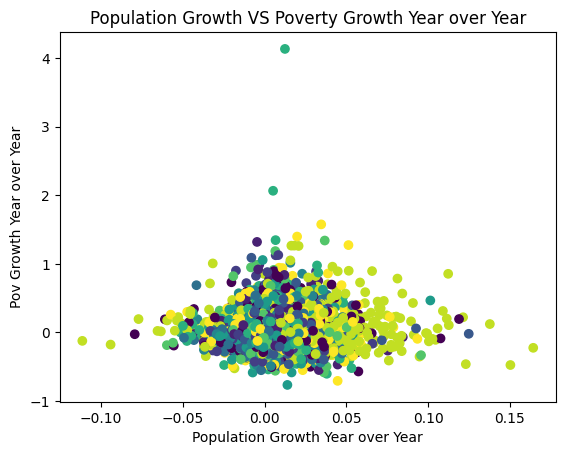

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(
    x=(df_yoy["total_pop_yoy"]), 
    y=(df_yoy["total_pov_ratio_yoy"]),
    c=(df_yoy["YEAR"])
)
plt.xlabel("Population Growth Year over Year")
plt.ylabel("Pov Growth Year over Year")
plt.title("Population Growth VS Poverty Growth Year over Year")

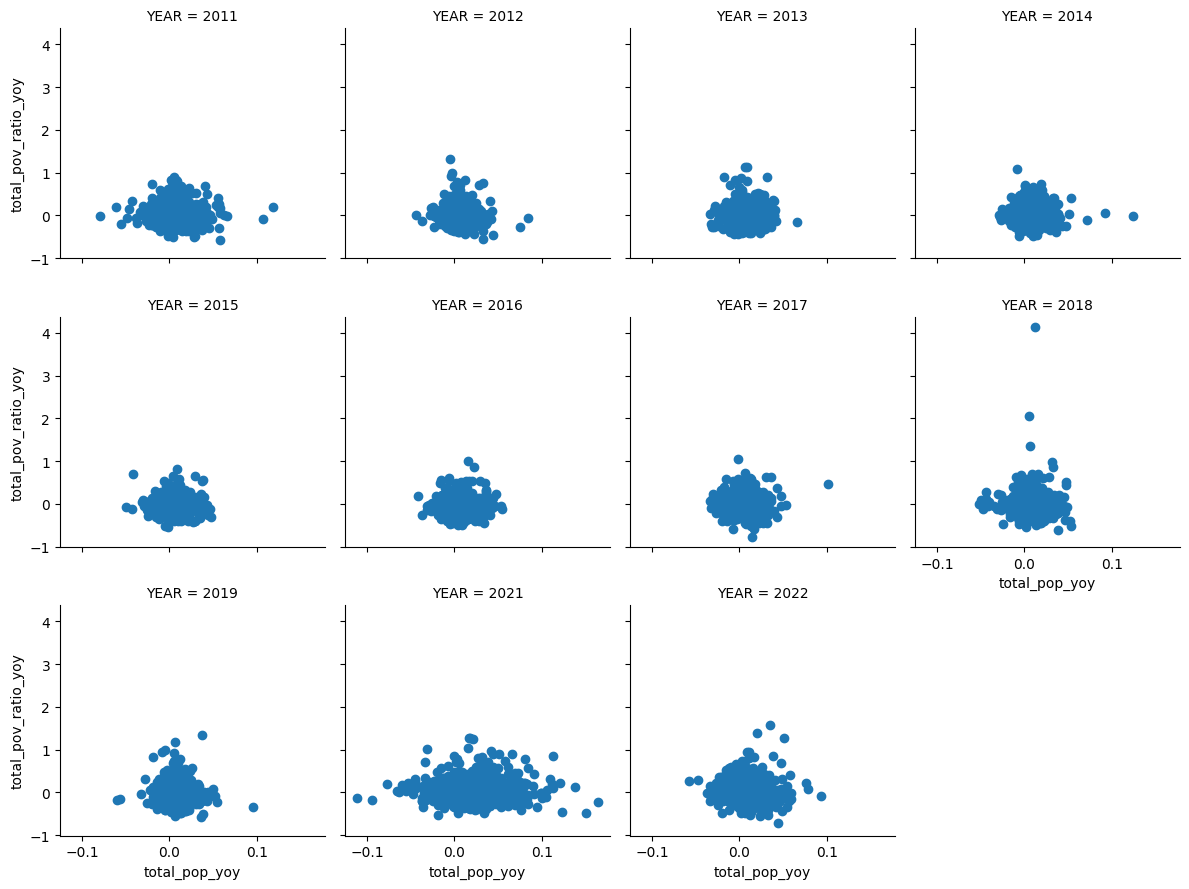

In [16]:
import seaborn as sns
df_yoy_t = df_yoy[df_yoy["YEAR"] != 2010]
g = sns.FacetGrid(df_yoy_t, col="YEAR", col_wrap=4)
g = g.map(plt.scatter, "total_pop_yoy", "total_pov_ratio_yoy")

These visualization appears to show no clear relationship between the population growth vs poverty growt, as the plot appears as a blob. 

When looking at each year individually, we still end up with no clear relationship coming through. 

Based on both of these plots, I think we can call this a failed Experiment.

# Results

## Objectives 1


## Objectives 2

Since we have no clear relationship what-so-ever, it is pointless to examine those 4 thoughts, as the aggregates would not have much meaning. This is possibly because we are looking at the population for which poverty can be determined, and that did not necessarily move in the same way the population growth moved. We likely would have had better information if we had used the true population and compared that to the poverty growth. 

# References

1. Joe Hasell, Max Roser, Esteban Ortiz-Ospina and Pablo Arriagada (2022) - “Poverty”
Published online at OurWorldInData.org. Retrieved from:
'https://ourworldindata.org/poverty' [Online Resource]

2. “Data Page: Share of population living in extreme poverty”, part of the following
publication: Joe Hasell, Max Roser, Esteban Ortiz-Ospina and Pablo Arriagada (2022) -
“Poverty”. Data adapted from World Bank Poverty and Inequality Platform. Retrieved
from https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty [online
resource]

3. Bureau, U. C. (2021, November 22). Income & Poverty Visualizations. Census.gov.
https://www.census.gov/topics/income-poverty/library/visualizations.html


# Datasets used for our project

- United States Census Bureau. S1701 Poverty Status in the Past 12 Months. Date
published 7/1/2023. 2012 - 2022 (excluding 2020). Date accessed 6/16/2024.

- United States Census Bureau. S0101 Age and Sex. Date published 7/1/2023. 2012 -
2022 (excluding 2020). Date accessed 6/16/2024.
  